In [97]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
raw_data = pd.read_excel('overseas_arrivals.xlsx', sheet_name='Data1', skiprows=9)

# change how data is displayed
pd.set_option('display.precision', 2)      
pd.set_option('display.float_format', '{:,.2f}'.format)  

# Australian Overseas Arrivals Analysis (1976-2023)

This notebook analyzes trends in overseas arrivals to Australia over nearly five decades, covering both short-term visitors (tourists) and long-term/permanent arrivals. The analysis explores temporal patterns, seasonal variations, and significant disruptions (notably COVID-19) that affected international travel to Australia.

The data provides insights into Australia's tourism patterns, migration trends, and the dramatic impact of border closures during the pandemic. We'll examine:

1. Long-term arrival trends and major disruptions
2. Seasonal visitation patterns 
3. Year-over-year changes in short-term visitor arrivals

In [100]:
# check the data
raw_data.head(3)
#raw_data.info()

,Permanent Arrivals,Long-term Residents Returning,Long-term Visitors Arriving,Permanent + Long-term Arrivals,Short-term Residents Returning,Short-term Visitors Arriving,Total Arrivals
Date,,,,,,,
1976-01-01,3780,5380,2750,11910,143370,47710,202990
1976-02-01,3900,4190,2730,10820,76370,49860,137040
1976-03-01,4790,4250,1940,10980,61900,46100,118980


## Data Preparation and Initial Exploration

Before diving into analysis, we need to understand the structure and quality of our dataset. The data contains overseas arrival statistics collected by the Australian Bureau of Statistics over several decades, with various categories of travelers tracked monthly.

In [99]:
# Drop the last column
raw_data = raw_data.iloc[:, :-1]

# Set first column ('Series ID') as the index (or rename if needed)
raw_data.set_index('Series ID', inplace=True)

# Drop columns where all values are NaN
raw_data = raw_data.dropna(axis=1, how='all')

column_names = [
    "Permanent Arrivals",
    "Long-term Residents Returning",
    "Long-term Visitors Arriving",
    "Permanent + Long-term Arrivals",
    "Short-term Residents Returning",
    "Short-term Visitors Arriving",
    "Total Arrivals"
]

raw_data.columns = column_names

raw_data.index.name = 'Date'

## Data Cleaning and Structure

The dataset requires some preprocessing to make it analysis-ready. We'll remove unnecessary columns, set the date as our index, and rename columns for clarity. The cleaned dataset will categorize arrivals into distinct groups, allowing us to distinguish between different types of visitors (tourists vs. permanent residents).

In [101]:
# data looks good, whta can we do with this intel ? 
data = raw_data.copy()
# craete a function to look at the summary data
def describe_series(series):
    return pd.DataFrame({
        'Min': series.min(),
        'Max': series.max(),
        'Mean': series.mean(),
        'Median': series.median(),
        'Std Dev': series.std(),
        'Range': series.max() - series.min(),
        'Count': series.count(),
        'Missing': series.isna().sum()
    }, index=[series.name])

# apply the function 
describe_series(data['Total Arrivals'])

,Min,Max,Mean,Median,Std Dev,Range,Count,Missing
Total Arrivals,14940,2383330,"739,450.95","625,020.00","536,301.30",2368390,591,0


## Descriptive Statistics

To get a sense of the scale and variation in our data, we'll create a custom function to generate summary statistics. This helps us understand the range of values, central tendencies, and variability in arrival numbers before visualization. Understanding these statistics will provide context for the patterns we observe in subsequent visualizations.

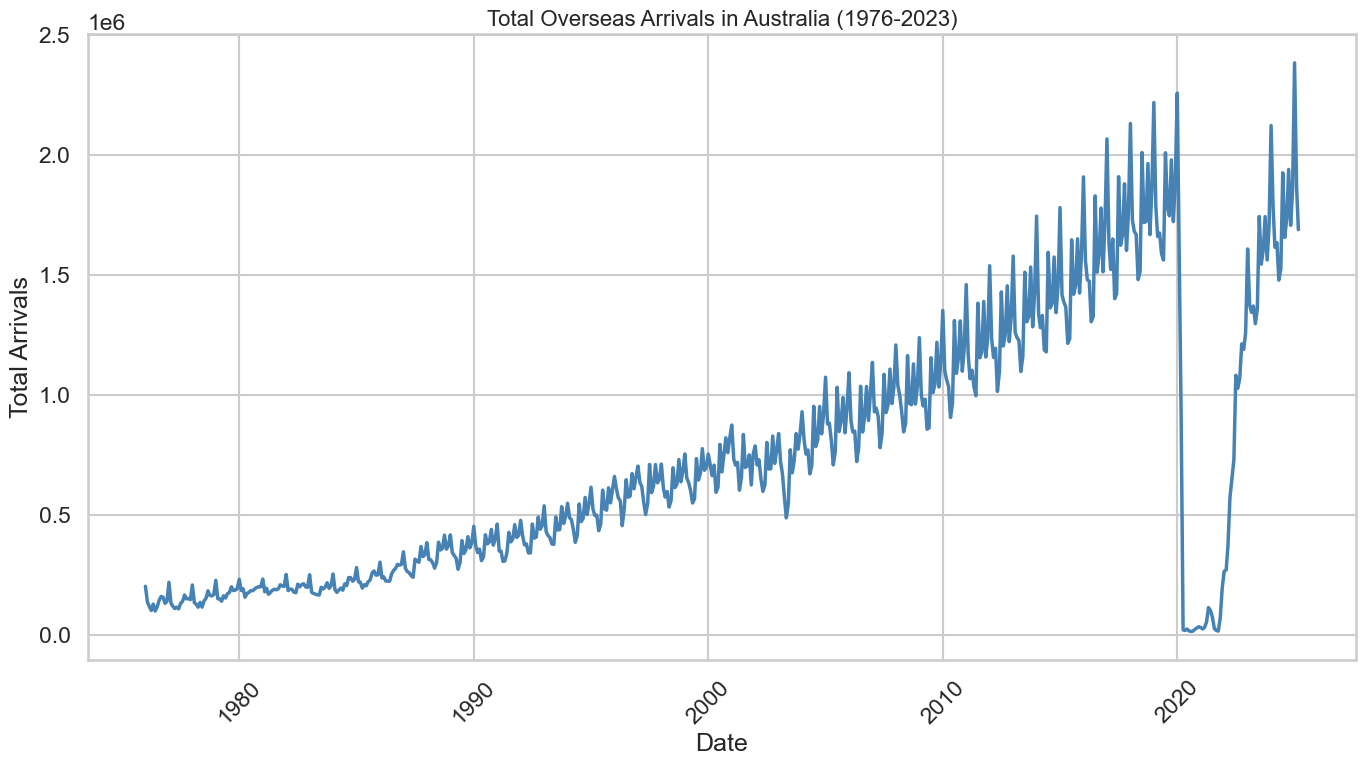

In [102]:
# visualise changes over time
df_plot = data['Total Arrivals'].reset_index()
df_plot.columns = ['Date', 'Total Arrivals']

# build the plot
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid", context="talk")
sns.lineplot(data=df_plot, x='Date', y='Total Arrivals', color='steelblue', linewidth=2.5)

# tidy the plot
plt.title('Total Overseas Arrivals in Australia (1976-2023)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Arrivals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Total Arrivals Over Time (1976-2023)

Our first visualization provides a high-level overview of all international arrivals to Australia over the nearly 50-year period. This long-term perspective allows us to identify major trends, turning points, and anomalies in Australia's international visitor patterns. **Key Takeaway #1**: Australia has experienced steady growth in international arrivals until a unprecedented disruption during the COVID-19 pandemic.

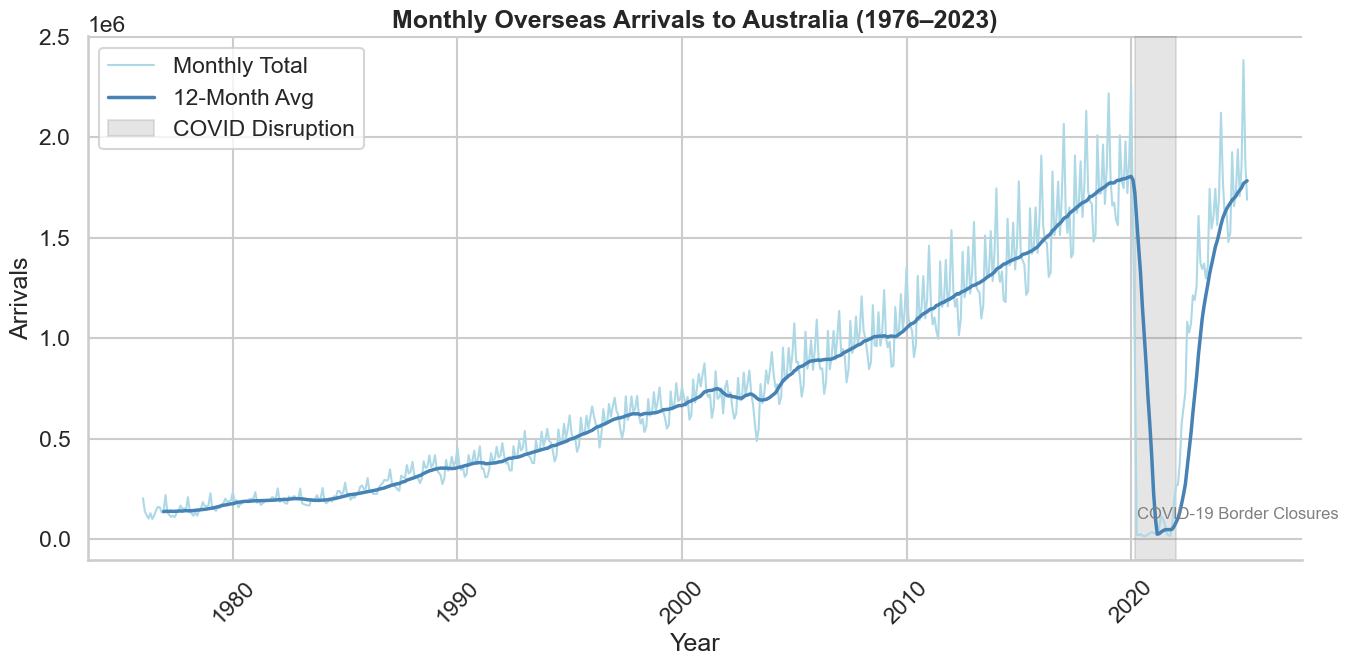

In [103]:
# fascinating plot, but i feellike we miss the story other a slow increase and a massive drop in COVID-era
# Compute rolling average (12 months)
df_plot['12M Rolling Avg'] = df_plot['Total Arrivals'].rolling(window=12).mean()

# Set theme
sns.set_theme(style="whitegrid", context="talk")

# Plot
plt.figure(figsize=(14, 7))

# Original line
sns.lineplot(data=df_plot, x='Date', y='Total Arrivals', color='lightblue', label='Monthly Total', linewidth=1.5)

# Rolling average line
sns.lineplot(data=df_plot, x='Date', y='12M Rolling Avg', color='steelblue', label='12-Month Avg', linewidth=2.5)

# Add shaded COVID disruption zone
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2022-01-01"), color='gray', alpha=0.2, label='COVID Disruption')

# Add annotation
plt.text(pd.to_datetime("2020-04-01"), 100000, "COVID-19 Border Closures", fontsize=12, color='gray')

# Style
plt.title("Monthly Overseas Arrivals to Australia (1976–2023)", fontsize=18, weight='bold')
plt.xlabel("Year")
plt.ylabel("Arrivals")
plt.xticks(rotation=45)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


## Long-term Trends and COVID-19 Impact

To better understand the long-term patterns and reduce noise from monthly fluctuations, we've added a 12-month rolling average line. This visualization highlights:

1. The steady increase in international arrivals from the 1970s through the 2010s
2. Seasonal patterns visible in the monthly fluctuations
3. The dramatic and unprecedented drop during the COVID-19 pandemic (highlighted in gray)

The pandemic created the most significant disruption to international travel in Australia's modern history, with arrivals virtually ceasing during border closures. **Key Takeaway #2**: The COVID-19 pandemic represented an unprecedented shock to Australia's international arrivals, completely halting decades of steady growth.

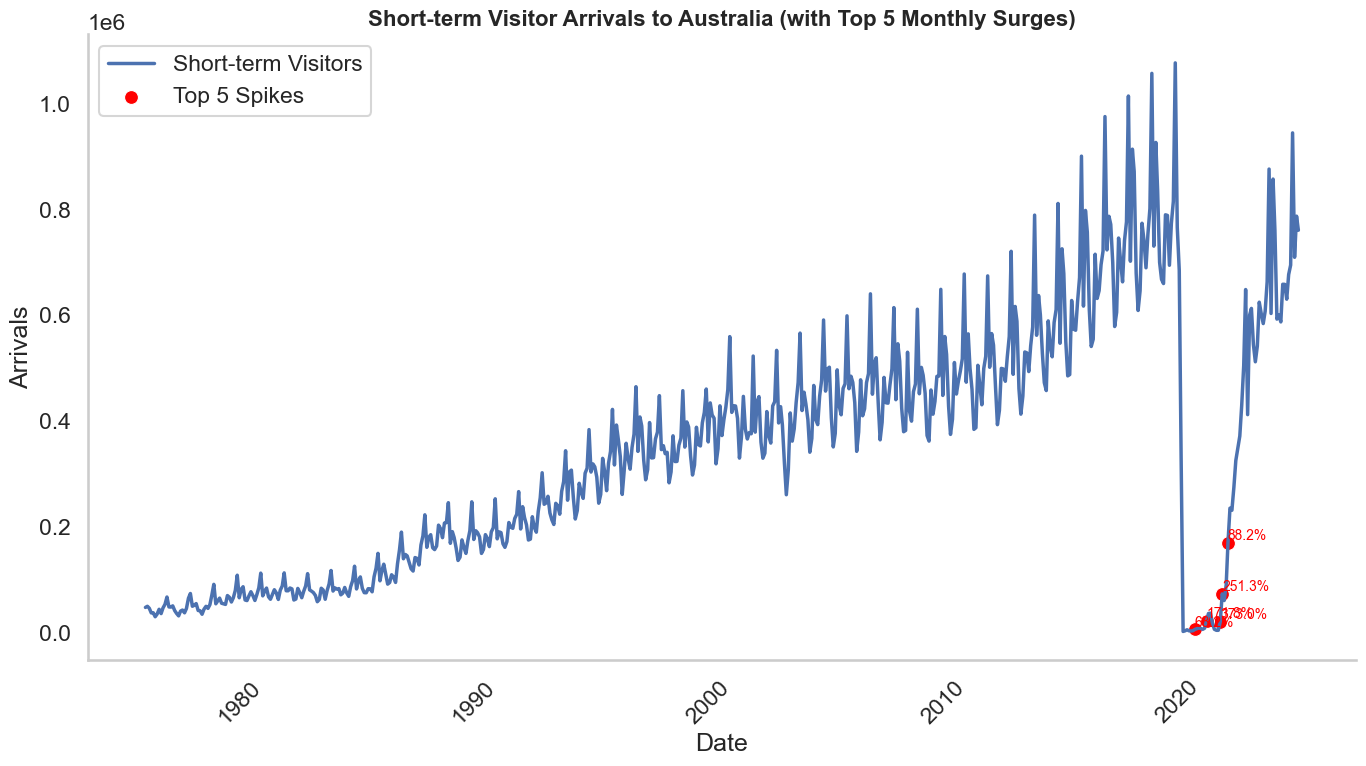

In [110]:
# that's arrivals of all kinds, let's look at tourism (short-term visitors) specifically. 
# Compute % change
data['pct_change'] = data['Short-term Visitors Arriving'].pct_change() * 100

# Identify top 5 spikes
top5 = data['pct_change'].nlargest(5)
top5_points = data.loc[top5.index]

#  Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x=data.index, y='Short-term Visitors Arriving', label='Short-term Visitors', linewidth=2.5)

# Highlight spikes
sns.scatterplot(data=top5_points, x=top5_points.index, y='Short-term Visitors Arriving', color='red', s=100, label='Top 5 Spikes')

# Annotate
for i in top5_points.index:
    plt.text(i, top5_points.loc[i, 'Short-term Visitors Arriving'] + 5000,
             f"{top5_points.loc[i, 'pct_change']:.1f}%", fontsize=10, color='red')

# Beautify
plt.title("Short-term Visitor Arrivals to Australia (with Top 5 Monthly Surges)", fontsize=16, weight='bold')
plt.xlabel("Date")
plt.ylabel("Arrivals")
plt.xticks(rotation=45)
plt.legend()
sns.despine()
plt.grid(False)
plt.tight_layout()
plt.show()


## Short-term Visitor Trends and Notable Spikes

Focusing specifically on short-term visitors (primarily tourists), this visualization identifies the five largest month-to-month increases in arrivals. These spikes often correspond to significant events, policy changes, or seasonal anomalies that drove unusual increases in tourism. The red dots highlight these exceptional months, with the percentage increase labeled.

These anomalies can provide insights into factors that dramatically influence tourism patterns, whether they're major international events hosted in Australia, changes to visa policies, or recovery periods after disruptions.

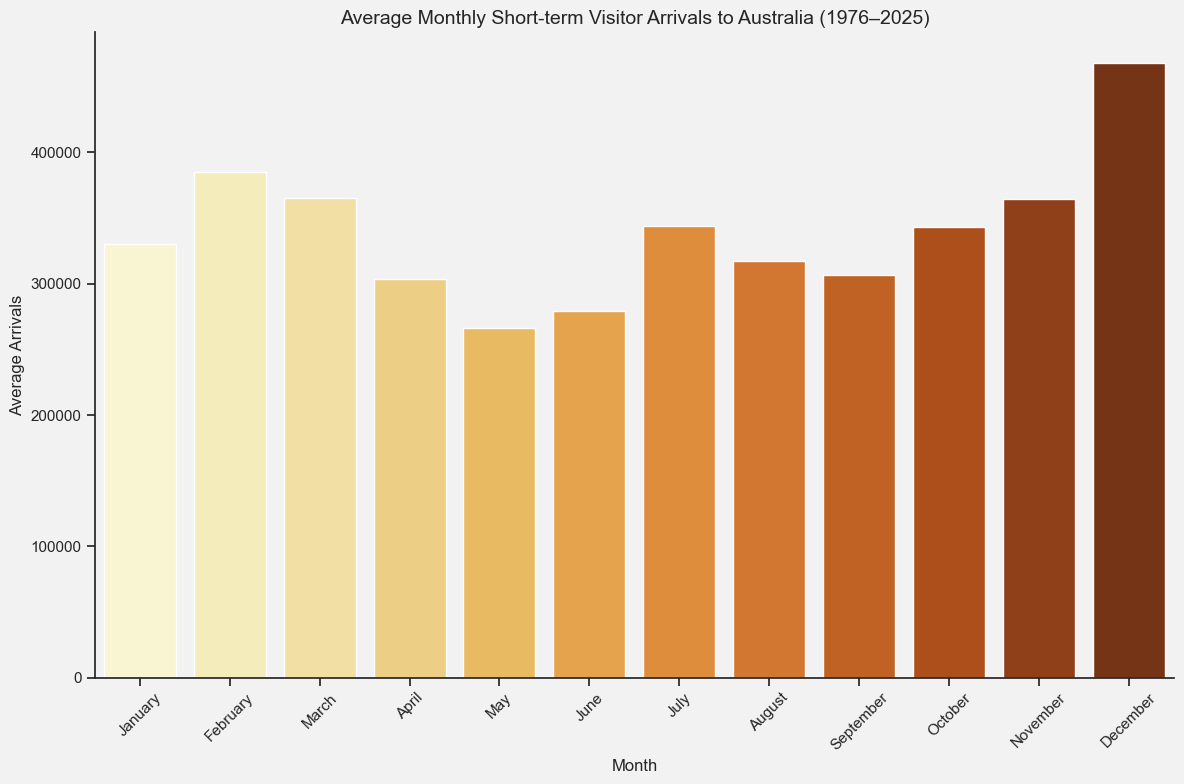

In [144]:
# Extract month names
data['Month'] = data.index.month_name()

# custom palette
palette_option = sns.color_palette("YlOrBr", n_colors=12)

# Calculate average short-term arrivals per month
monthly_avg = data.groupby('Month')['Short-term Visitors Arriving'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])


# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, hue=monthly_avg.index, dodge=False, palette=palette_option)
plt.xticks(rotation=45)
plt.title("Average Monthly Short-term Visitor Arrivals to Australia (1976–2025)", fontsize=14)
plt.ylabel("Average Arrivals")
plt.xlabel("Month")
sns.despine()

# Background color
plt.gca().set_facecolor('#f2f2f2')  # light grey plot area
plt.gcf().patch.set_facecolor('#f2f2f2')  # figure background

# Add grid lines
plt.tight_layout()
plt.show()


## Seasonal Patterns in Tourism

This bar chart reveals the strong seasonal patterns in Australia's international tourism. By averaging nearly five decades of monthly data, we can clearly identify which months consistently attract the most visitors.

The visualization shows that December and January typically see the highest tourist arrivals, corresponding to Australia's summer and the northern hemisphere's winter. This pattern reflects Australia's appeal as a warm-weather destination during the northern winter, as well as holiday travel during the Christmas and New Year period.

**Key Takeaway #3**: Australia's tourism has strong seasonal patterns, with summer months (December-February) consistently attracting the highest number of international visitors across decades of data.

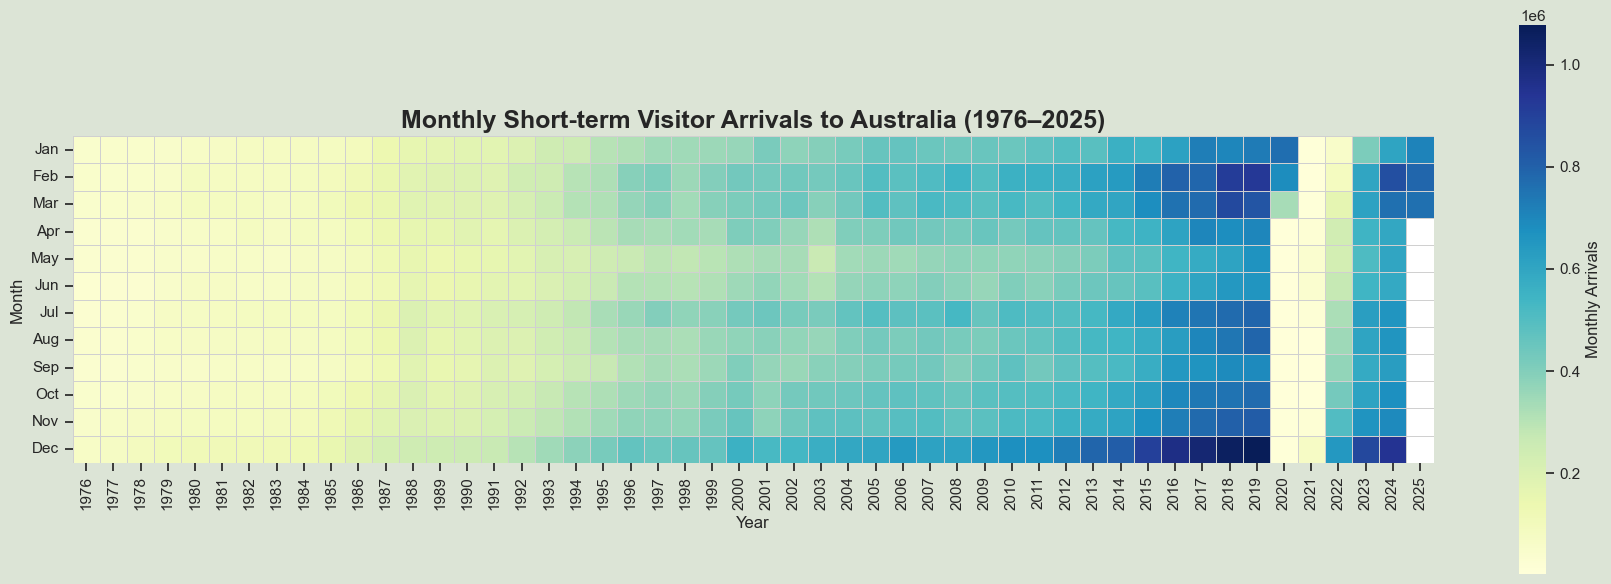

In [163]:
# before we go let's try one other way to visualise seasonality in tourism. 
# Extract year & month
data['Year'] = data.index.year
data['Month'] = data.index.strftime('%b')

# Pivot table
pivot = data.pivot_table(index='Month', columns='Year',
                         values='Short-term Visitors Arriving')

# Reorder months
pivot = pivot.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot
plt.figure(figsize=(18, 6))
sns.set_theme(style="ticks")
fig = plt.gcf()
fig.patch.set_facecolor('#dce4d6')
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5, linecolor="#d0d0d0", cbar_kws={'label': 'Monthly Arrivals'}, square=True)
# Aesthetic upgrades
plt.title("Monthly Short-term Visitor Arrivals to Australia (1976–2025)", fontsize=18, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.tight_layout()
plt.show()


## Year-over-Year Monthly Patterns (Heatmap)

This heatmap provides a comprehensive view of short-term visitor patterns across both time (years) and seasons (months). The color intensity represents the number of arrivals, with darker blue indicating higher visitor numbers.

This visualization allows us to see:

1. The overall growth trend across decades (generally darkening colors from left to right)
2. Consistent seasonal patterns (darker cells typically in December/January)
3. The dramatic impact of COVID-19 (sudden light colors in 2020-2021)
4. The beginning of recovery in more recent periods

The heatmap effectively synthesizes nearly 50 years of monthly data into a single visualization that captures both long-term trends and seasonal patterns simultaneously.

## Conclusion

This analysis of Australia's international arrival data from 1976 to 2023 provides valuable insights into tourism patterns, long-term trends, and the impact of major disruptions. The visualizations reveal a story of steady growth over decades, consistent seasonal patterns, and the unprecedented shock of the COVID-19 pandemic.

### Key Takeaways:

1. **Long-term Growth with Dramatic Disruption**: Australia experienced consistent growth in international arrivals for over four decades until the COVID-19 pandemic caused an unprecedented collapse in visitor numbers.

2. **COVID-19's Historic Impact**: The pandemic created the most significant disruption to international travel in Australia's recorded history, completely halting the long-term growth trend temporarily.

3. **Strong Seasonal Patterns**: Australia's international arrivals show consistent seasonal patterns across decades, with summer months (particularly December and January) attracting the highest number of visitors.

These insights can inform tourism planning, infrastructure development, and policy decisions as Australia continues to recover from the pandemic disruption and builds toward future growth in international visitation.